## 6. Multi-class Classification of Fashion Apparels using DNN

### R.NEWLINBLESSY--- 225229122

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

## 1)Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## 2) Perform basic exploratory data analysis

In [3]:
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


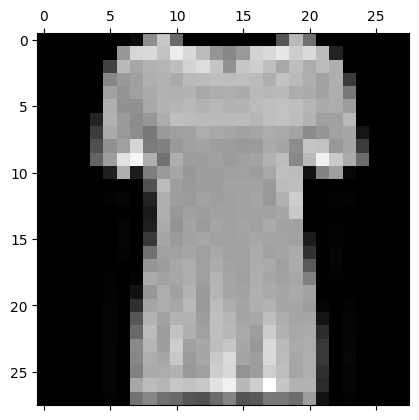

In [4]:
plt.matshow(train_images[10],cmap='gray')
plt.show()

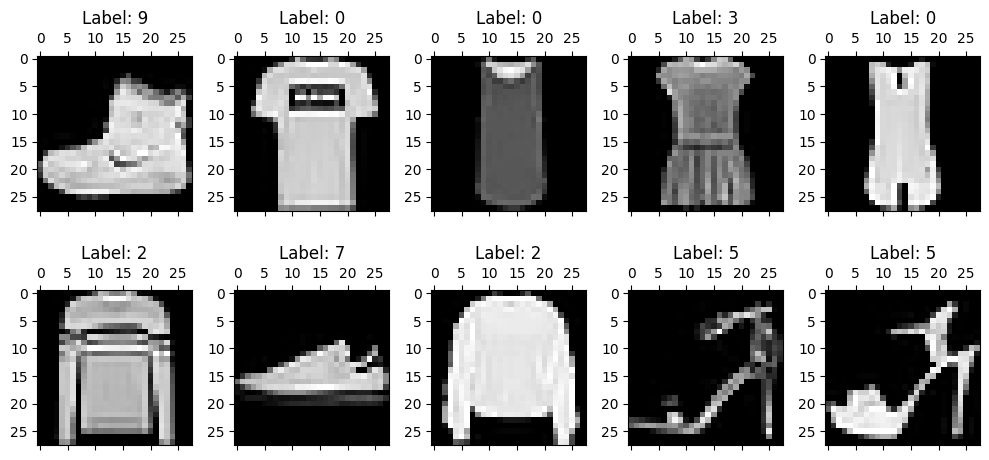

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.matshow(train_images[i],cmap='gray')
    ax.set_title(f"Label: {train_labels[i]}")
plt.tight_layout()
plt.show()

## 3) Normalize

In [6]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

## 4) Build a simple baseline model

In [7]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [8]:
def create_baseline_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [9]:
model = create_baseline_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_images.reshape(-1, 28*28), train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.5286 - accuracy: 0.8155 - val_loss: 0.4236 - val_accuracy: 0.8523
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.3871 - accuracy: 0.8624 - val_loss: 0.3910 - val_accuracy: 0.8606
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3432 - accuracy: 0.8756 - val_loss: 0.3509 - val_accuracy: 0.8746
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.3172 - accuracy: 0.8853 - val_loss: 0.3366 - val_accuracy: 0.8808
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2971 - accuracy: 0.8925 - val_loss: 0.3230 - val_accuracy: 0.8838
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2805 - accuracy: 0.8968 - val_loss: 0.3418 - val_accuracy: 0.8735
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2684 - accuracy: 0.9015 - val_loss: 0.3333 - val_accuracy: 0.8777

In [11]:
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28*28), test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.8839
Test accuracy: 0.883899986743927


## 5) Performance analysis

In [12]:
import time

In [13]:
def create_model(num_layers, num_nodes, optimizer='adam', loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(num_nodes, activation='relu', input_shape=(28*28,)))
    for _ in range(num_layers - 1):
        model.add(Dense(num_nodes, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [14]:
num_layers_list = [2,3,4,5]
num_nodes_list = [128,256,512]

In [15]:
num_parameters_list = []
training_accuracy_list = []
testing_accuracy_list = []
running_time_list = []

In [16]:
optimizers_list = ['adam', 'rmsprop', 'sgd']
loss_function = 'categorical_crossentropy'

In [17]:
for num_layers in num_layers_list:
    for num_nodes in num_nodes_list:
        for optimizer in optimizers_list:
            model = create_model(num_layers, num_nodes, optimizer=optimizer, loss=loss_function)

            start_time = time.time()
            history = model.fit(train_images.reshape(-1, 28*28), train_labels, epochs=5, batch_size=128, validation_split=0.2, verbose=0)
            end_time = time.time()
            running_time = end_time - start_time
            test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28*28), test_labels, verbose=0)
            num_parameters_list.append(model.count_params())
            training_accuracy_list.append(max(history.history['accuracy']))  
            testing_accuracy_list.append(test_acc)
            running_time_list.append(running_time)

In [18]:
for i, num_layers in enumerate(num_layers_list):
    for j, num_nodes in enumerate(num_nodes_list):
        index = i * len(num_nodes_list) + j
        model_config = f"{num_layers} layers, {num_nodes} nodes"
        print(f"Model: {model_config}")
        print(f"Parameters Learned: {num_parameters_list[index]}")
        print(f"Training Accuracy: {training_accuracy_list[index]}")
        print(f"Testing Accuracy: {testing_accuracy_list[index]}")
        print(f"Running Time: {running_time_list[index]} seconds\n")

Model: 2 layers, 128 nodes
Parameters Learned: 118282
Training Accuracy: 0.8878541588783264
Testing Accuracy: 0.8671000003814697
Running Time: 10.946807861328125 seconds

Model: 2 layers, 256 nodes
Parameters Learned: 118282
Training Accuracy: 0.8851666450500488
Testing Accuracy: 0.8636000156402588
Running Time: 9.910669326782227 seconds

Model: 2 layers, 512 nodes
Parameters Learned: 118282
Training Accuracy: 0.8216458559036255
Testing Accuracy: 0.8073999881744385
Running Time: 8.933750629425049 seconds

Model: 3 layers, 128 nodes
Parameters Learned: 269322
Training Accuracy: 0.8947916626930237
Testing Accuracy: 0.8709999918937683
Running Time: 12.059271335601807 seconds

Model: 3 layers, 256 nodes
Parameters Learned: 269322
Training Accuracy: 0.8865833282470703
Testing Accuracy: 0.8712999820709229
Running Time: 11.753384113311768 seconds

Model: 3 layers, 512 nodes
Parameters Learned: 269322
Training Accuracy: 0.8273333311080933
Testing Accuracy: 0.8166999816894531
Running Time: 10.2

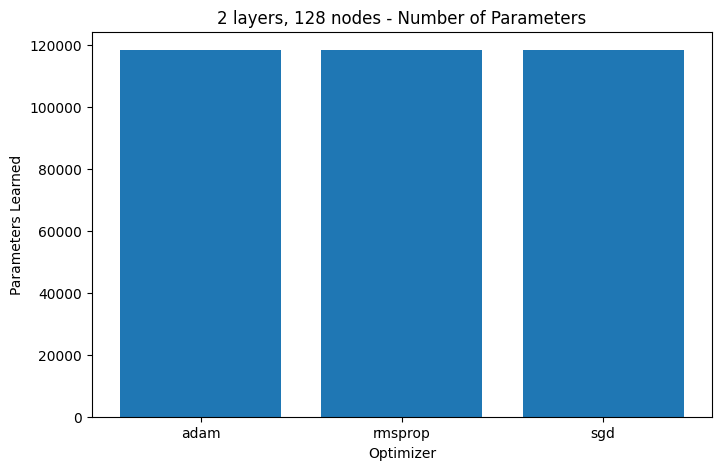

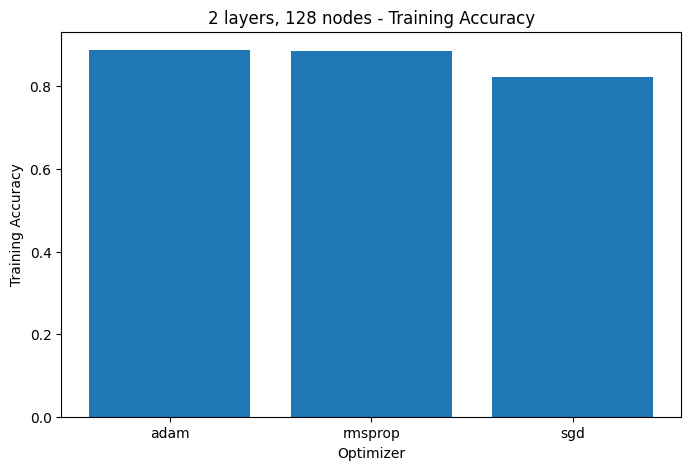

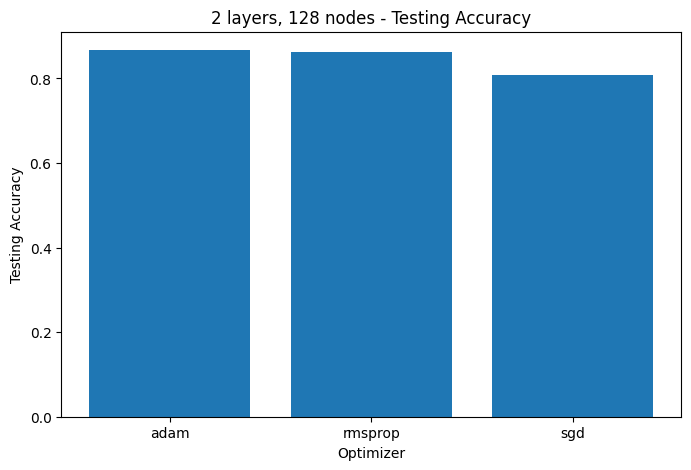

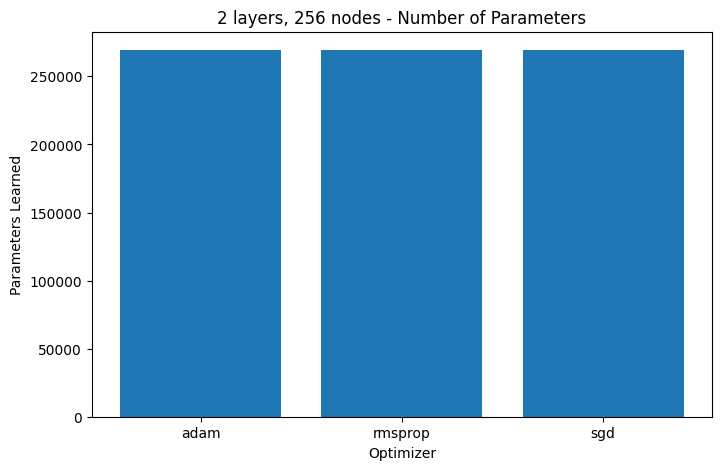

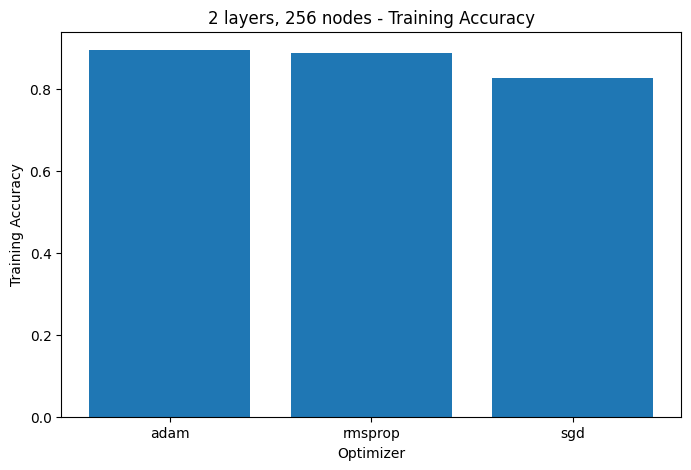

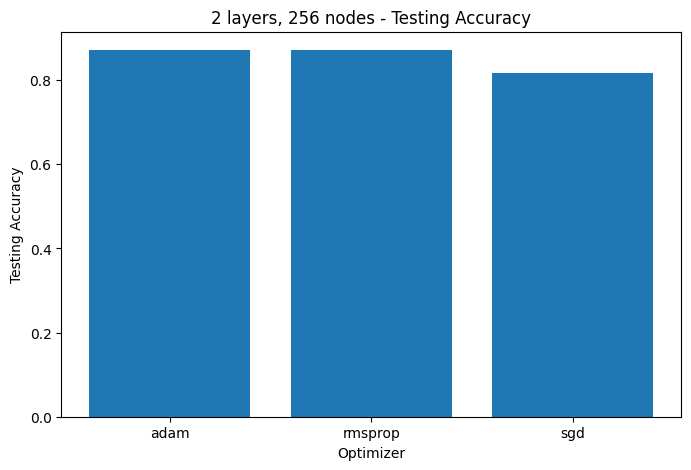

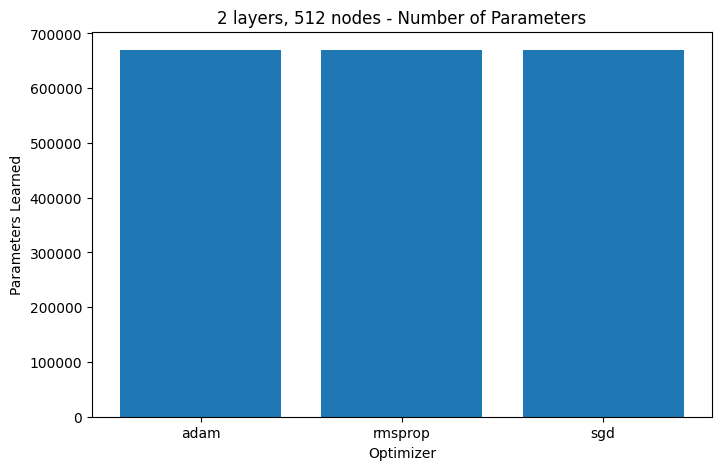

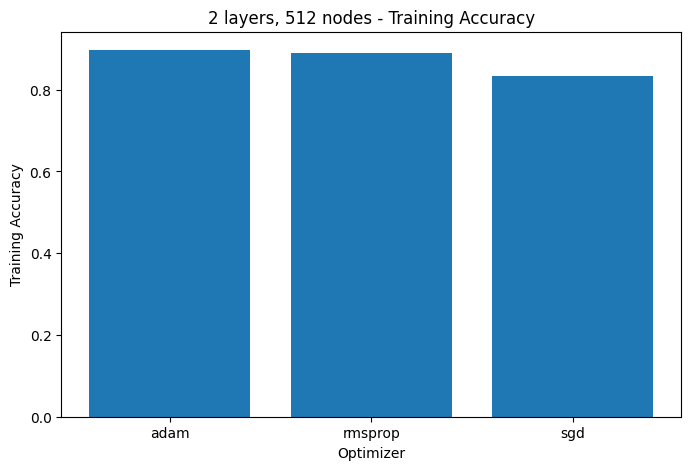

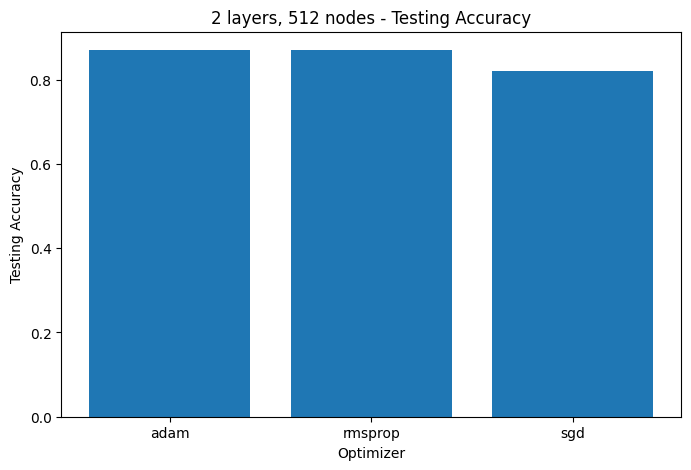

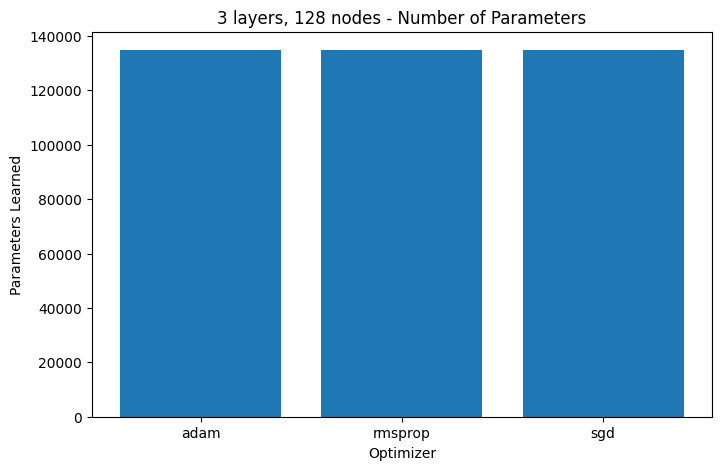

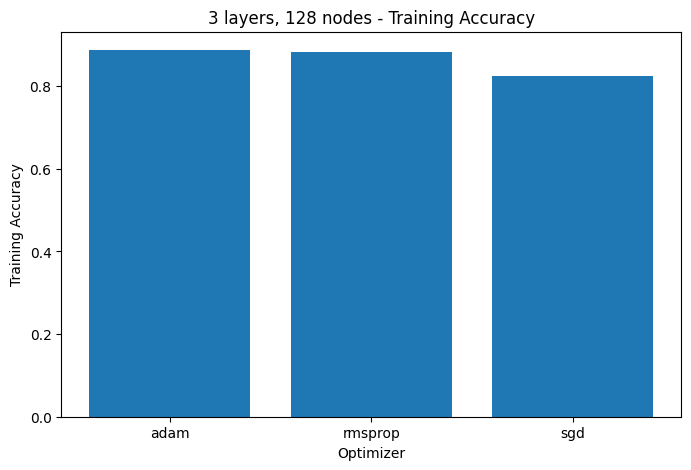

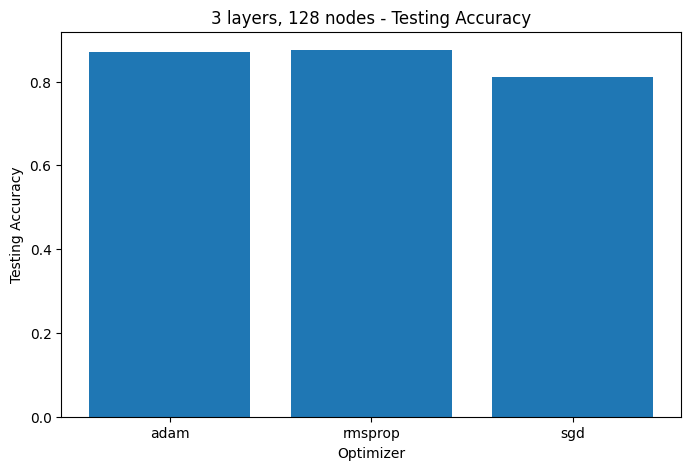

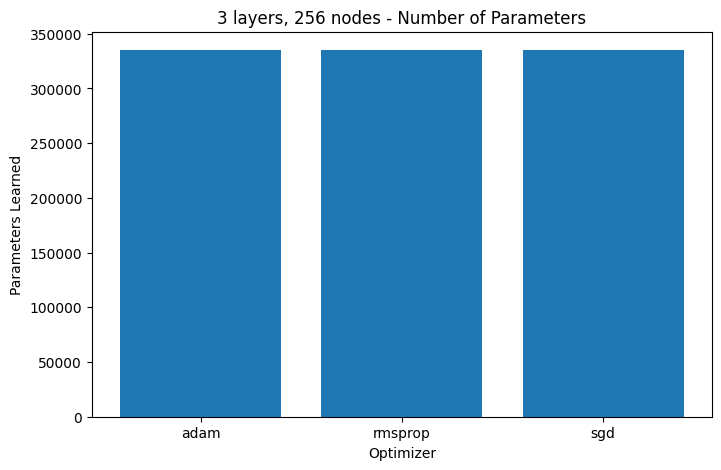

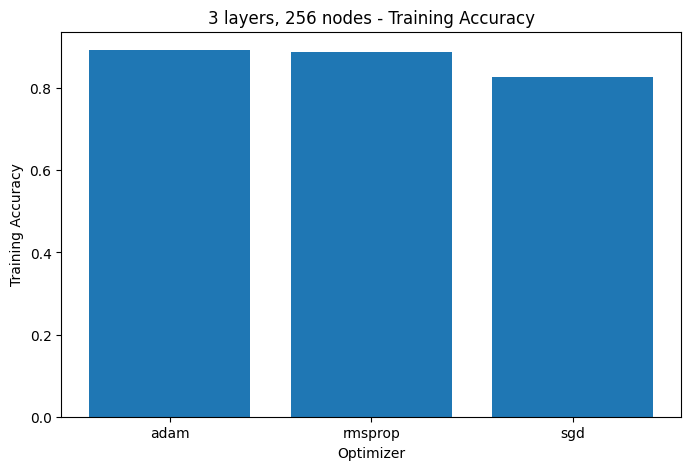

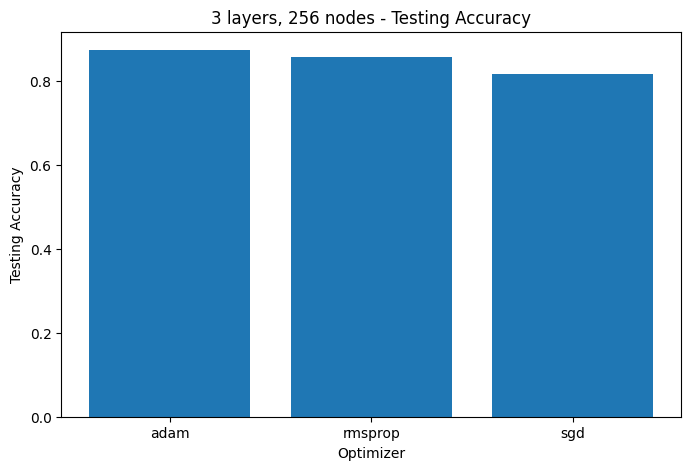

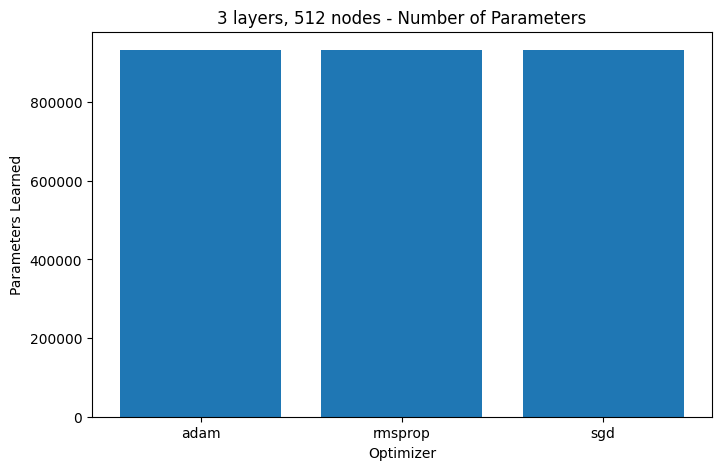

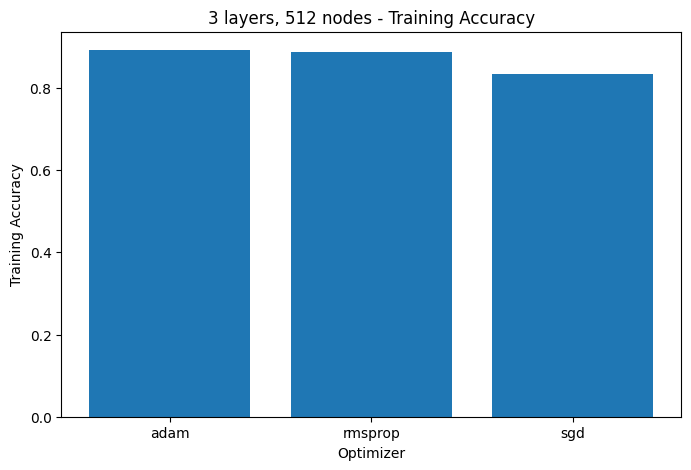

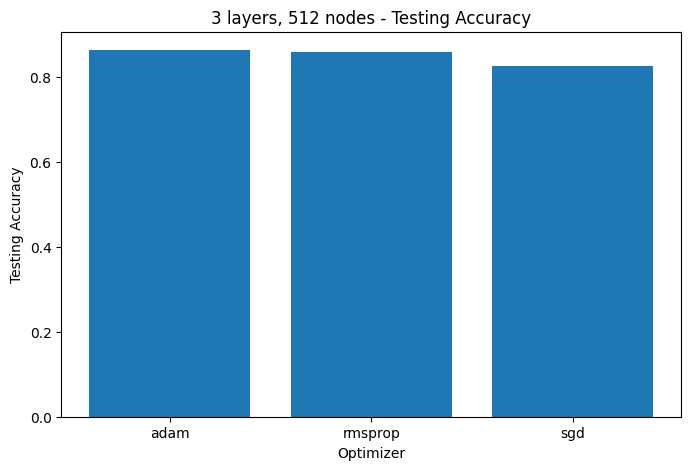

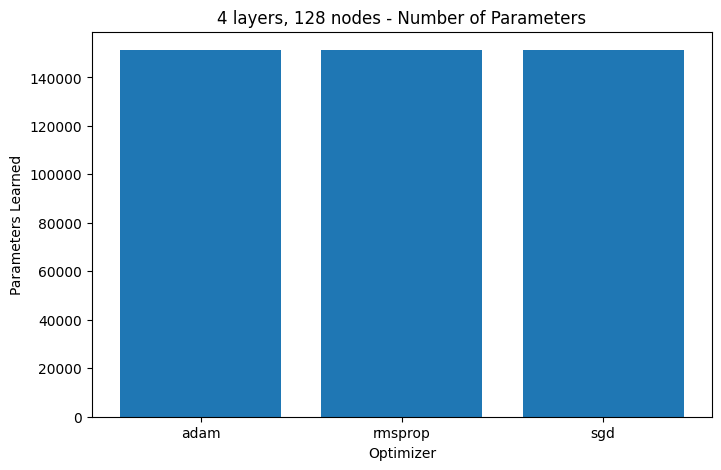

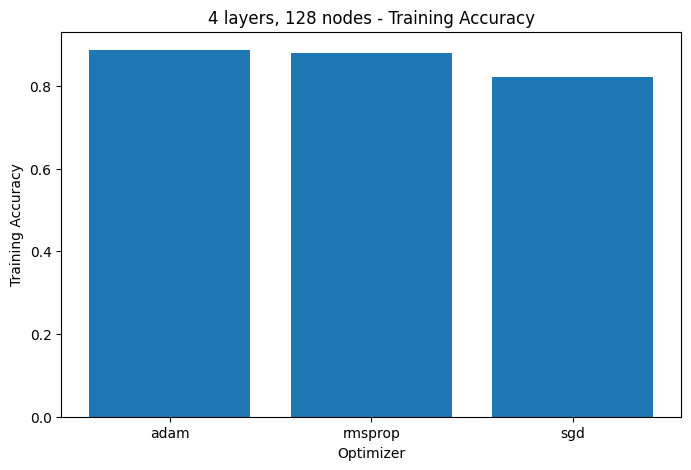

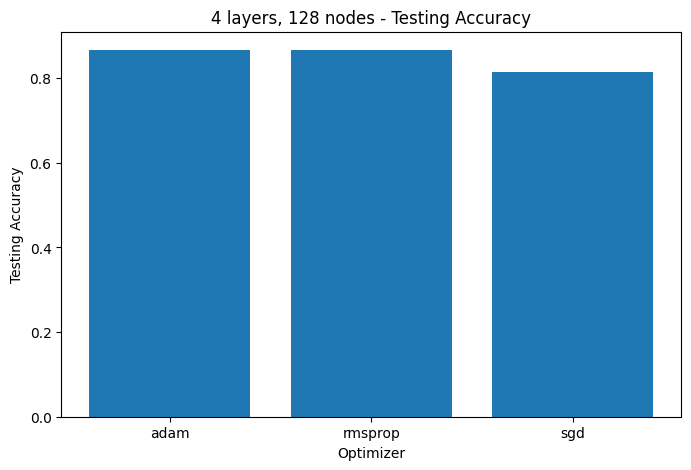

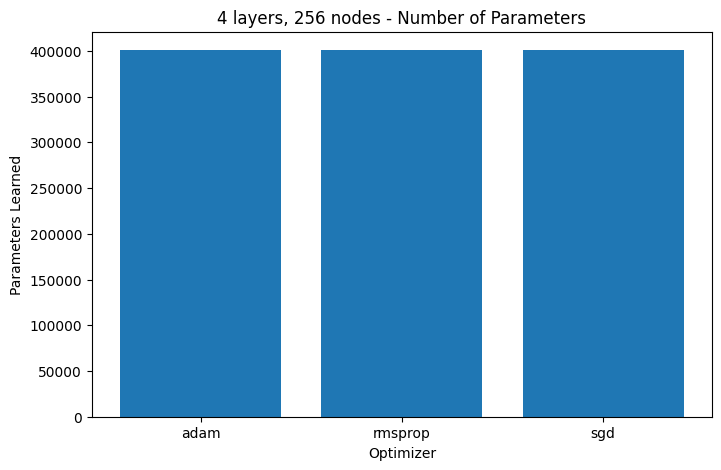

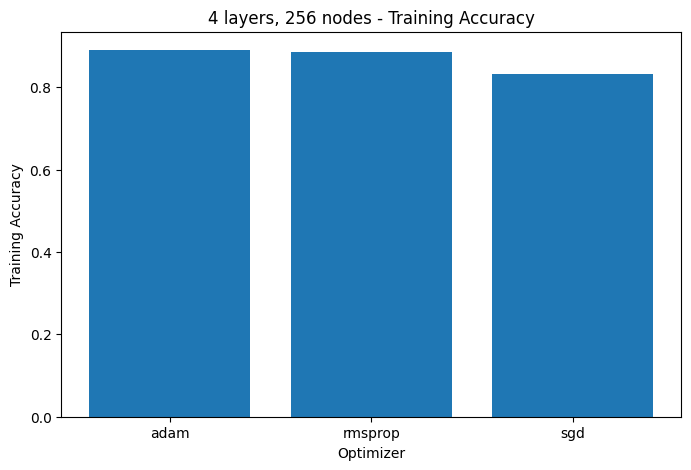

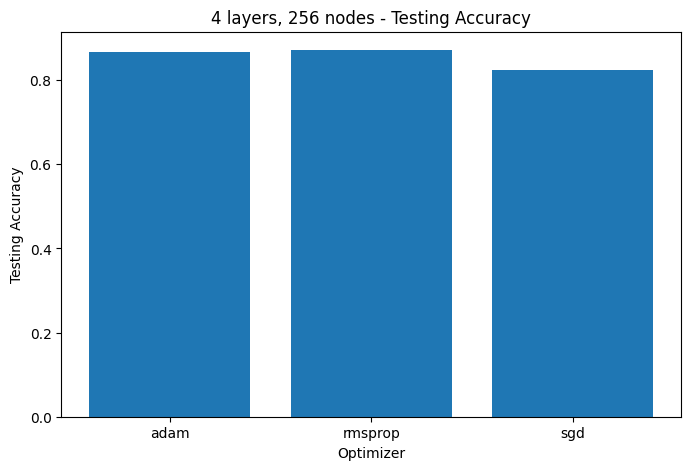

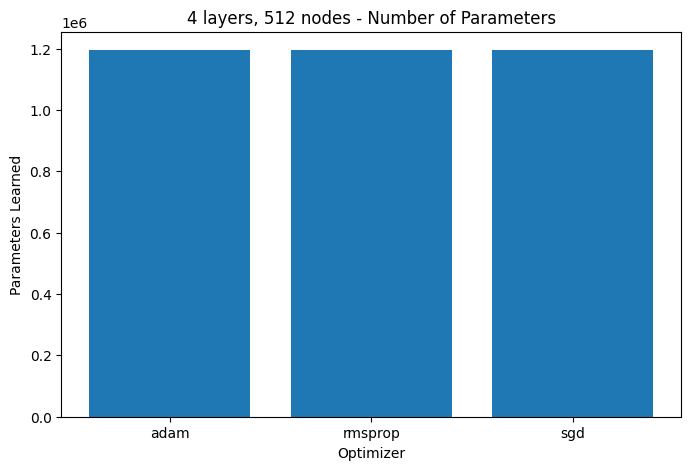

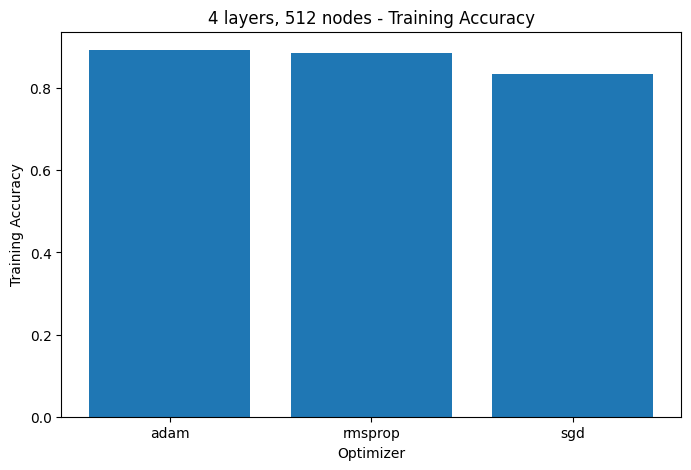

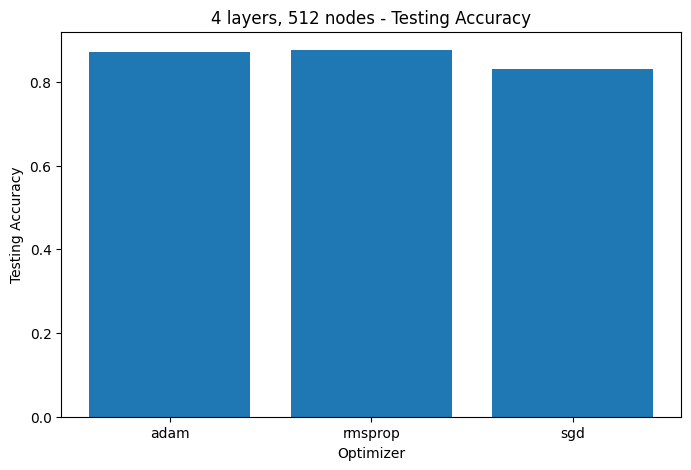

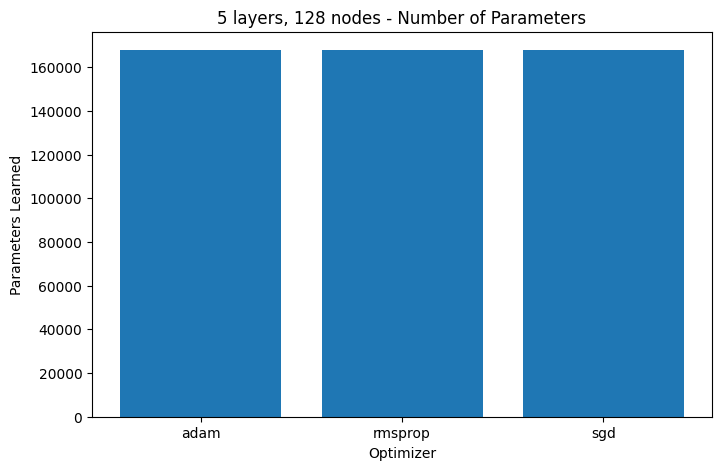

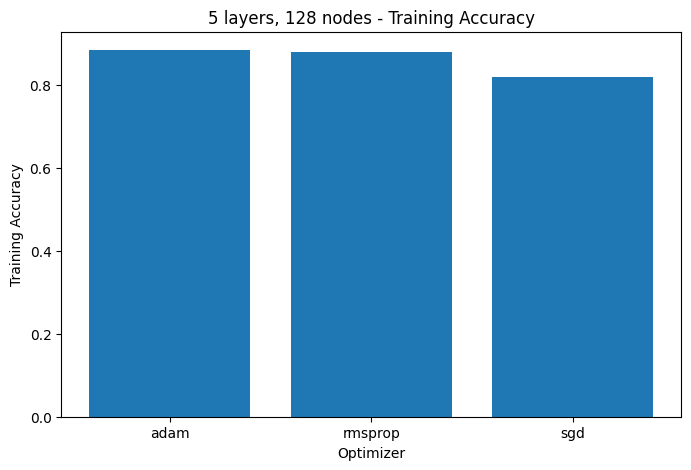

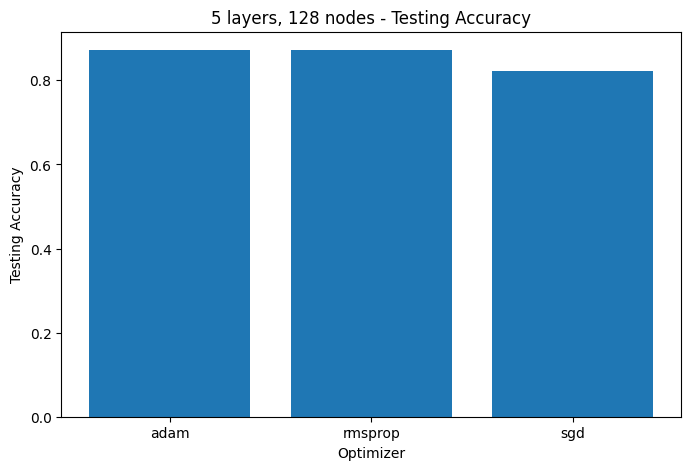

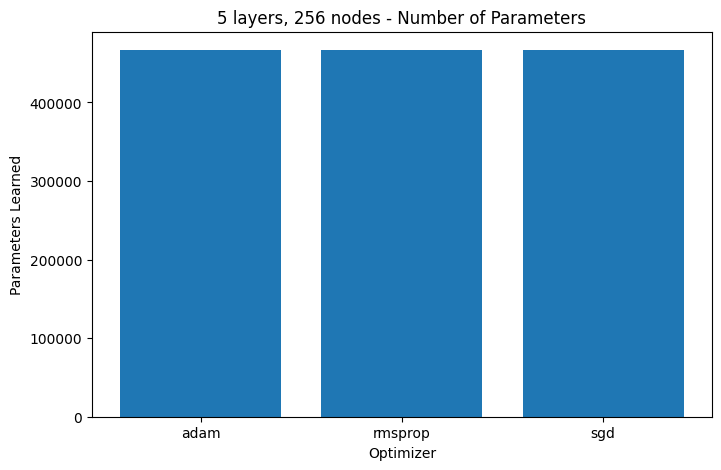

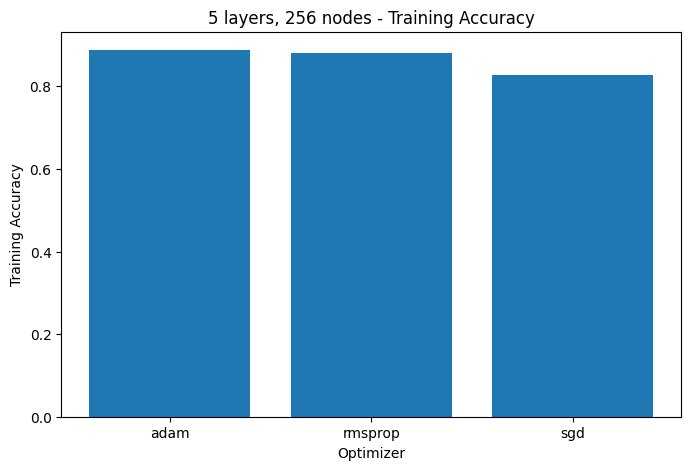

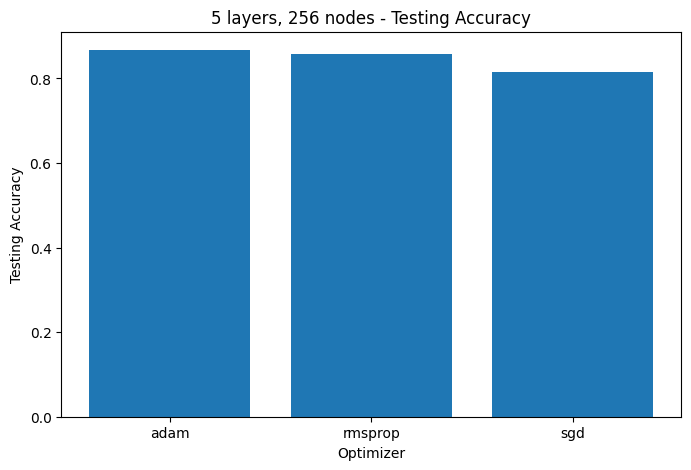

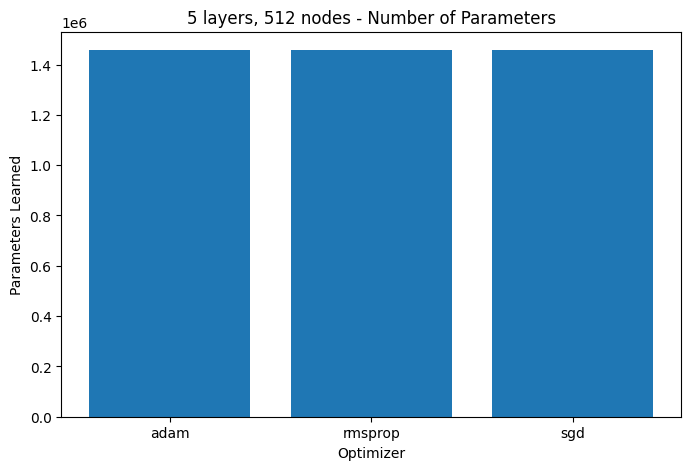

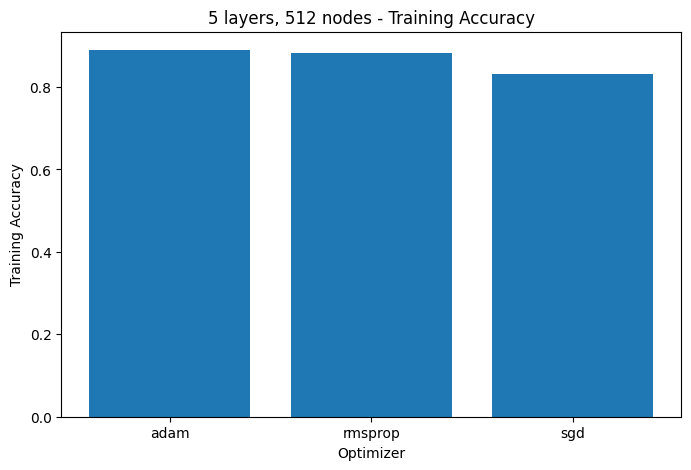

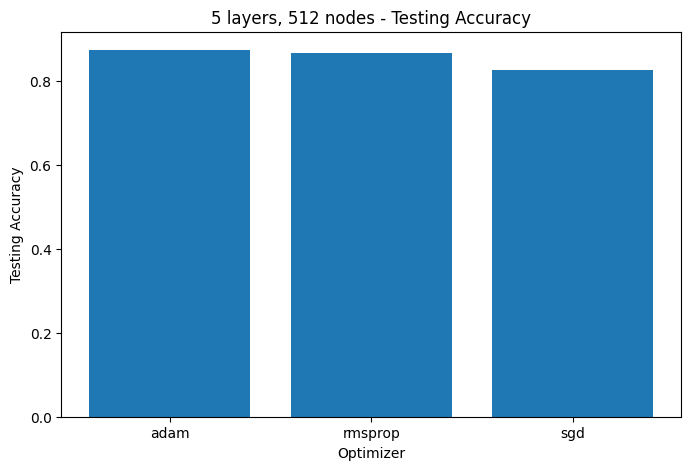

In [20]:
for i, num_layers in enumerate(num_layers_list):
    for j, num_nodes in enumerate(num_nodes_list):
        plt.figure(figsize=(8, 5))
        plt.bar(optimizers_list, [num_parameters_list[k] for k in range(i * len(num_nodes_list) * len(optimizers_list) + j * len(optimizers_list), i * len(num_nodes_list) * len(optimizers_list) + (j + 1) * len(optimizers_list))])
        plt.title(f"{num_layers} layers, {num_nodes} nodes - Number of Parameters")
        plt.xlabel("Optimizer")
        plt.ylabel("Parameters Learned")
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.bar(optimizers_list, [training_accuracy_list[k] for k in range(i * len(num_nodes_list) * len(optimizers_list) + j * len(optimizers_list), i * len(num_nodes_list) * len(optimizers_list) + (j + 1) * len(optimizers_list))])
        plt.title(f"{num_layers} layers, {num_nodes} nodes - Training Accuracy")
        plt.xlabel("Optimizer")
        plt.ylabel("Training Accuracy")
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.bar(optimizers_list, [testing_accuracy_list[k] for k in range(i * len(num_nodes_list) * len(optimizers_list) + j * len(optimizers_list), i * len(num_nodes_list) * len(optimizers_list) + (j + 1) * len(optimizers_list))])
        plt.title(f"{num_layers} layers, {num_nodes} nodes - Testing Accuracy")
        plt.xlabel("Optimizer")
        plt.ylabel("Testing Accuracy")
        plt.show()